# Project: cleanning - [candy data]


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- import packages and load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import process
from fuzzywuzzy import fuzz

pd.options.mode.chained_assignment = None
df = pd.read_excel("candyhierarchy2017.xlsx", encoding='latin-1')
pd.set_option('display.max_columns', None)

<a id='wrangling'></a>
## Data Wrangling



### General Properties

# 2- show some general properties for the data 

In [2]:
df.shape

(2460, 120)

In [3]:
df.iloc[[*range(2), *range(-2, 0)]]

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [5]:
df.dtypes.iloc[[*range(7), *range(-12, 0)]]

Internal ID                           int64
Q1: GOING OUT?                       object
Q2: GENDER                           object
Q3: AGE                              object
Q4: COUNTRY                          object
Q5: STATE, PROVINCE, COUNTY, ETC     object
Q6 | 100 Grand Bar                   object
Q6 | York Peppermint Patties         object
Q7: JOY OTHER                        object
Q8: DESPAIR OTHER                    object
Q9: OTHER COMMENTS                   object
Q10: DRESS                           object
Unnamed: 113                         object
Q11: DAY                             object
Q12: MEDIA [Daily Dish]             float64
Q12: MEDIA [Science]                float64
Q12: MEDIA [ESPN]                   float64
Q12: MEDIA [Yahoo]                  float64
Click Coordinates (x, y)             object
dtype: object

In [6]:
df.nunique().iloc[[*range(7), *range(-12, 0)]]

Internal ID                         2460
Q1: GOING OUT?                         2
Q2: GENDER                             4
Q3: AGE                              106
Q4: COUNTRY                          128
Q5: STATE, PROVINCE, COUNTY, ETC     511
Q6 | 100 Grand Bar                     3
Q6 | York Peppermint Patties           3
Q7: JOY OTHER                        867
Q8: DESPAIR OTHER                    685
Q9: OTHER COMMENTS                   385
Q10: DRESS                             2
Unnamed: 113                           1
Q11: DAY                               2
Q12: MEDIA [Daily Dish]                1
Q12: MEDIA [Science]                   1
Q12: MEDIA [ESPN]                      1
Q12: MEDIA [Yahoo]                     1
Click Coordinates (x, y)             952
dtype: int64

In [7]:
round(df.isnull().sum().iloc[[*range(7), *range(-12, 0)]]*100/len(df),2)

Internal ID                          0.00
Q1: GOING OUT?                       4.47
Q2: GENDER                           1.67
Q3: AGE                              3.41
Q4: COUNTRY                          2.60
Q5: STATE, PROVINCE, COUNTY, ETC     4.07
Q6 | 100 Grand Bar                  30.37
Q6 | York Peppermint Patties        28.66
Q7: JOY OTHER                       62.97
Q8: DESPAIR OTHER                   70.85
Q9: OTHER COMMENTS                  84.31
Q10: DRESS                          30.24
Unnamed: 113                        99.63
Q11: DAY                            29.47
Q12: MEDIA [Daily Dish]             96.54
Q12: MEDIA [Science]                44.63
Q12: MEDIA [ESPN]                   95.98
Q12: MEDIA [Yahoo]                  97.28
Click Coordinates (x, y)            34.76
dtype: float64

In [8]:
df.duplicated().sum()

0

In [9]:
df[df.isnull().all(axis=1)].index

Int64Index([], dtype='int64')

# 3- write summary about what you get form the above functions
> #### tips : this summary can be about : if there is any missing values , if there a wrong data type , if there a wrong range of values , ....

# Note :
>Above data has 120 columns some of them have str entries (Age, Country, State ,Other...) whereas other 114 has Categorical entries.

>Data has zero duplicate and zero null row.

>Data has 2460 rows and 120 columns.

>Q6 columns are the main columns why this survey is created

>Q7, Q8, Q9 and "Unnamed: 113" columns have much missing values.

# cleaning

### 4- drop all the useless columns and  rows with too much NaN , 

### Droping useless columns

In [10]:
df.drop(["Unnamed: 113", "Internal ID", "Click Coordinates (x, y)", 'Q7: JOY OTHER', 
        'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS'] , axis="columns", inplace=True)

### renaming columns

In [11]:
df.rename(columns = {'Q1: GOING OUT?' : 'Going Out?',
                          'Q2: GENDER' : 'Gender',
                          'Q3: AGE': 'Age',
                          'Q4: COUNTRY' : 'Country',
                          'Q5: STATE, PROVINCE, COUNTY, ETC' : 'Area',
                          'Q10: DRESS' : 'Dress',
                          'Q11: DAY': 'Day',
                          'Q12: MEDIA [Daily Dish]' : 'DailyDish',
                          'Q12: MEDIA [Science]': 'Science',
                          'Q12: MEDIA [ESPN]' : 'ESPN',
                          'Q12: MEDIA [Yahoo]': 'Yahoo'}, inplace=True)

In [12]:
df.columns = [x for x in df.columns.str.replace("Q6 \| ",'')]

In [13]:
df.head(1)

,Going Out?,Gender,Age,Country,Area,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,DailyDish,Science,ESPN,Yahoo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Droping useless rows

In [14]:
df.iloc[:,5:-6].columns

Index(['100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Any full-sized candy bar', 'Black Jacks', 'Bonkers (the candy)',
       'Bonkers (the board game)', 'Bottle Caps', 'Box'o'Raisins',
       'Broken glow stick', 'Butterfinger',
       ...
       'Three Musketeers', 'Tolberone something or other', 'Trail Mix', 'Twix',
       'Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Vicodin', 'Whatchamacallit Bars', 'White Bread',
       'Whole Wheat anything', 'York Peppermint Patties'],
      dtype='object', length=103)

In [15]:
df[df.iloc[:,5:-6].isnull().all(axis=1)].index

Int64Index([   0,    2,    6,   10,   18,   19,   24,   25,   30,   35,
            ...
            2437, 2440, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2458],
           dtype='int64', length=657)

In [16]:
df = df.drop(df[df.iloc[:,5:-6].isnull().all(axis=1)].index)

>Droping all the rows where all Q6 values are null.

### Resetting the index of the dataframe

In [17]:
df = df.reset_index()
df.drop(['index'] , axis="columns", inplace=True)

In [18]:
df.head(3)

,Going Out?,Gender,Age,Country,Area,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,DailyDish,Science,ESPN,Yahoo
0,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
1,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
2,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,1.0,NaN,NaN


### 5 - clean `going out` column 

In [19]:
df['Going Out?'].unique()

array(['No', 'Yes', nan], dtype=object)

In [20]:
df['Going Out?'].isnull().sum()

64

In [21]:
df['Going Out?']=df['Going Out?'].fillna('Maybe')
df['Going Out?'].value_counts()

No       1500
Yes       239
Maybe      64
Name: Going Out?, dtype: int64

### 6 - clean ` gender` column 

In [22]:
df['Gender'].unique()

array(['Male', 'Female', "I'd rather not say", 'Other', nan], dtype=object)

In [23]:
df['Gender'].isnull().sum()

11

In [24]:
df['Gender']=df['Gender'].fillna("I'd rather not say")
df['Gender'].value_counts()

Male                  1087
Female                 618
I'd rather not say      72
Other                   26
Name: Gender, dtype: int64

### 7 - clean ` age` column 
> tip : note the type of age column , and NaN values
 - try to use `to_numeric` 
 - tip : you should choose which best value to put in place of these NaNs ( mean, median, ....etc)

In [25]:
df['Age'].unique()

array([44, 40, 23, nan, 33, 53, 56, 64, 43, 37, 59, 48, 45, 49, 34, 35,
       38, 58, 50, 47, 52, 63, 65, 41, 31, 61, 46, 54, 62, 29, 42, 39, 36,
       32, 28, 69, 67, 30, 25, 22, 51, 70, 24, 27, 18, 19, 'Old enough',
       57, 66, 12, 'Many', 60, 55, '?', 21, 11, 'no', 68, 20, 6, 10, 71,
       90, 13, 26, '45-55', 312, 72, 99, 'hahahahaha', 9, 88, 39.4, 74,
       102, 'older than dirt', 15, 8, 75, 17, 'Enough', 'See question 2',
       '24-50', 7, 14, 'Over 50', 76, 100, 1000, 16, '46 Halloweens.',
       'ancient', 77, 'OLD', 'old', 'MY NAME JEFF', 4, 73,
       '59 on the day after Halloween', 'old enough',
       'I can remember when Java was a cool new language'], dtype=object)

In [26]:
df['Age']=pd.to_numeric(df['Age'], errors='coerce')

>Converting ` age` column to numeric type using ` to_numeric` and the string types will equal to `Nan`

In [27]:
df['Age'].unique()

array([  44. ,   40. ,   23. ,    nan,   33. ,   53. ,   56. ,   64. ,
         43. ,   37. ,   59. ,   48. ,   45. ,   49. ,   34. ,   35. ,
         38. ,   58. ,   50. ,   47. ,   52. ,   63. ,   65. ,   41. ,
         31. ,   61. ,   46. ,   54. ,   62. ,   29. ,   42. ,   39. ,
         36. ,   32. ,   28. ,   69. ,   67. ,   30. ,   25. ,   22. ,
         51. ,   70. ,   24. ,   27. ,   18. ,   19. ,   57. ,   66. ,
         12. ,   60. ,   55. ,   21. ,   11. ,   68. ,   20. ,    6. ,
         10. ,   71. ,   90. ,   13. ,   26. ,  312. ,   72. ,   99. ,
          9. ,   88. ,   39.4,   74. ,  102. ,   15. ,    8. ,   75. ,
         17. ,    7. ,   14. ,   76. ,  100. , 1000. ,   16. ,   77. ,
          4. ,   73. ])

In [28]:
df['Age'].isnull().sum()

55

In [29]:
df.Age[df['Age']>80]=np.nan

In [30]:
df['Age'].isnull().sum()

63

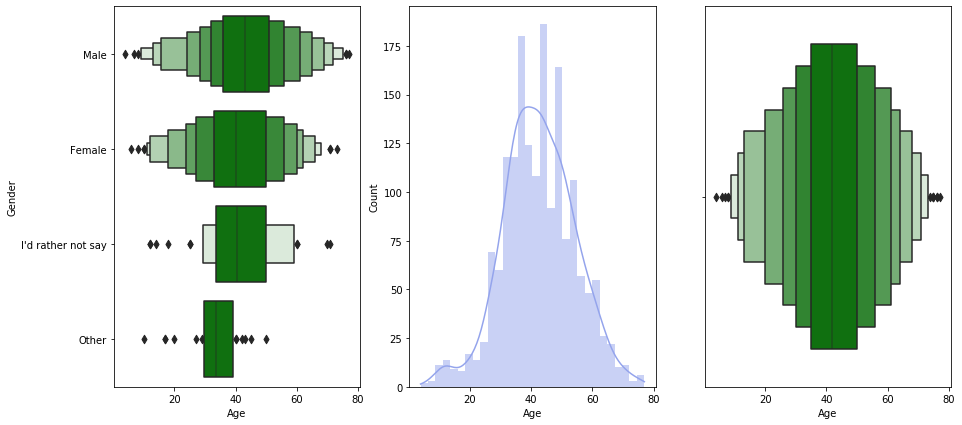

In [31]:
fig, ax =plt.subplots(1,3, figsize=(15,7))
sns.boxenplot(x='Age', y="Gender", color="g", scale="linear", data=df, width = .8, ax=ax[0])
sns.histplot(data=df, x='Age', kde=True, color='#94A4EC', linewidth=0, ax=ax[1])
sns.boxenplot(x='Age', color="g", scale="linear", data=df, width = .8, ax=ax[2]);

>According to the figs above the data is slightly skewed so it's better to impute missing values with the `median` 
What i did here I filled missing values with different median values based on `Gender` column to reduce biasing.

In [32]:
Age = df.groupby(['Gender']).median()['Age']
Age = pd.DataFrame(Age)
Age

,Age
Gender,
Female,40.0
I'd rather not say,40.5
Male,43.0
Other,33.5


In [33]:
for i in Age.index:
    df.loc[df['Gender']==i, 'Age']=df.loc[df['Gender']==i, 'Age'].fillna(Age.loc[i][0])

In [34]:
df['Age'].isna().sum()

0

In [35]:
df = df[df['Age'].between(5, 80, inclusive="both")]
df['Age']=df['Age'].astype(int)

In [36]:
df['Age'].unique()

array([44, 40, 23, 43, 33, 53, 56, 64, 37, 59, 48, 45, 49, 34, 35, 38, 58,
       50, 47, 52, 63, 65, 41, 31, 61, 46, 54, 62, 29, 42, 39, 36, 32, 28,
       69, 67, 30, 25, 22, 51, 70, 24, 27, 18, 19, 57, 66, 12, 60, 55, 21,
       11, 68, 20,  6, 10, 71, 13, 26, 72,  9, 74, 15,  8, 75, 17,  7, 14,
       76, 16, 77, 73], dtype=int64)

### 8 - clean ` country` column
> tip : note that country column has country names with different writing ways 
  - use fuzzywuzzy to deal with this problem
  - you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [37]:
df['Country'].unique()

array(['USA ', 'us', 'usa', nan, 'canada', 'Canada', 'Us', 'US', 'Murica',
       'USA', 'uk', 'United States', 'united states', 'Usa',
       'United staes', 'United Kingdom', 'United States of America',
       'UAE', 'United States ', 'England', 'canada ', 'United states',
       'u.s.a.', 'USAUSAUSA', 'america', 'france',
       'United States of America ', 'U.S.A.', 'Mexico', 'Canada ',
       'united states of america', 'US of A', 'UK', 'Unites States',
       'The United States', 'North Carolina ', 'Netherlands', 'Europe',
       'Earth', 'U S', 'u.s.', 'Costa Rica',
       'The United States of America', 'cascadia', 'insanity lately',
       'Greece', 'USA? Hard to tell anymore..', "'merica", 'Pittsburgh',
       'United State', 'France', 'U.S.', 'A', 'Can', 'Canae', 'New York',
       'Trumpistan', 'Ireland', 'United Sates', 'Korea', 'Australia',
       'California', 'Japan', 'USa', 'South africa',
       'I pretend to be from Canada, but I am really from the United States.',
 

In [38]:
df['Country'] = df['Country'].str.strip().str.lower()

In [39]:
countries = pd.Series(['usa', 'united states of america','america','united kingdom england', 'hong kong', 'china', 'sweden', 'spain',
                       'ireland', 'taiwan', 'singapore', 'netherlands', 
                       'indonesia', 'south korea', 'switzerland', 'denmark', 'scotland', 'canada', 'iceland', 'south africa', 
                       'japan', 'greece', 'costa rica', 'germany', 'finland', 'france', 'mexico'])

for country in countries:
    matches = process.extract(country, df['Country'], limit = df.shape[0])
    for potential_match in matches:
        if potential_match[1] >= 80:
            df.loc[df['Country'] == potential_match[0], 'Country'] = country
            
df['Country'].unique()

array(['usa', nan, 'canada', 'murica', 'uk', 'america', 'uae',
       'united kingdom england', 'u.s.a.', 'france', 'mexico',
       'north carolina', 'netherlands', 'europe', 'earth', 'costa rica',
       'cascadia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', 'pittsburgh', 'canae', 'new york',
       'trumpistan', 'iceland', 'south korea', 'australia', 'california',
       'japan', 'south africa', 'scotland', 'denmark', 'switzerland',
       'new jersey', 'germany', 'endland', 'atlantis', 'murrika',
       'alaska', 'singapore', 'taiwan', 'china', 'spain', 'narnia',
       'u s a', 'subscribe to dm4uz3 on youtube', "i don't know anymore",
       'fear and loathing'], dtype=object)

> Getting the potential match of the countries series using the process from `Fuzzywuzzy` library

In [40]:
df['Country'].value_counts()

usa                               978
america                           557
canada                            160
uk                                 12
u.s.a.                              8
germany                             7
netherlands                         4
iceland                             4
france                              3
scotland                            3
japan                               3
mexico                              2
south korea                         2
australia                           2
denmark                             2
switzerland                         2
new york                            1
alaska                              1
endland                             1
taiwan                              1
insanity lately                     1
usa? hard to tell anymore..         1
costa rica                          1
south africa                        1
earth                               1
u s a                               1
united kingd

In [41]:
mapping = {'murica':'usa', 'united states of america':'usa','america':'usa', 'u.s.a.':'usa',
'north carolina':'usa', 'usa? hard to tell anymore..':'usa', 'pittsburgh':'usa', 'new york':'usa', 'trumpistan':'usa',
          'california':'usa', 'ud':'usa', 'new jersey':'usa', 'endland':'uk', 'soviet canuckistan':'canada',
           'u s a':'usa', 'united kingdom england':'uk', 'u.k.':'uk', 'cascadia':'usa'}
df['Country'] = df['Country'].replace(mapping)

In [42]:
df.Country[~df['Country'].isin(['usa', 'uk','canada'])]='other'

> Just manual mapping followed with keeping just `['usa', 'uk','canada']` and all the other countries will be assigned to `other`

In [43]:
df['Country'] = df['Country'].str.upper()
df['Country'].value_counts()

USA       1553
CANADA     160
OTHER       75
UK          14
Name: Country, dtype: int64

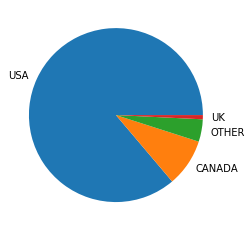

In [44]:
plt.pie(df['Country'].value_counts(),labels=df['Country'].value_counts().index)
plt.show()

### 9 - clean ` area` column

In [45]:
df['Area'].nunique()

433

I won't do this one more time.

In [46]:
df.drop('Area' , axis="columns", inplace=True)
df.head(1)

,Going Out?,Gender,Age,Country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,DailyDish,Science,ESPN,Yahoo
0,No,Male,44,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN


### 10 - clean ` Q6` columns
>- Q6 has all kinds of chocolate bars and questions with three distinct options to choose from (Joy, Meh, Despair).

In [47]:
df.iloc[:,4:-6].columns

Index(['100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Any full-sized candy bar', 'Black Jacks', 'Bonkers (the candy)',
       'Bonkers (the board game)', 'Bottle Caps', 'Box'o'Raisins',
       'Broken glow stick', 'Butterfinger',
       ...
       'Three Musketeers', 'Tolberone something or other', 'Trail Mix', 'Twix',
       'Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Vicodin', 'Whatchamacallit Bars', 'White Bread',
       'Whole Wheat anything', 'York Peppermint Patties'],
      dtype='object', length=103)

In [48]:
df.iloc[:,4:-6].isna().sum().sum()

10121

In [49]:
# for i in df.iloc[:,4:-6].columns:
#     df.loc[df[i].isna(), i] = df[i].mode().iloc[0]

In [50]:
df.iloc[:,4:-6]=df.iloc[:,4:-6].fillna('MEH')  #survey

In [51]:
df.head(3)

,Going Out?,Gender,Age,Country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,DailyDish,Science,ESPN,Yahoo
0,No,Male,44,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
1,No,Male,40,USA,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
2,No,Male,23,USA,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,MEH,JOY,JOY,DESPAIR,MEH,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,1.0,NaN,NaN


In [52]:
df.iloc[:,4:-6].isna().sum().sum()

0

### 11 - clean ` dress` column


In [53]:
df['Dress'].unique()

array(['White and gold', nan, 'Blue and black'], dtype=object)

In [54]:
df['Dress']=df['Dress'].fillna('Other')

### 12 - clean ` day` column

In [55]:
df['Day'].unique()

array(['Sunday', 'Friday', nan], dtype=object)

In [56]:
df['Day']=df['Day'].fillna('Friday')

### 12 - clean ` Media` column

In [57]:
media = df.iloc[:,-4:]
for i in media.columns:
    media.loc[media[i] == 1.0, i] = i
df['Media'] = media[media.columns].apply(lambda x: ''.join(x.dropna().astype(str)),axis=1)
df['Media']=df['Media'].astype('category')
df.drop(['DailyDish', 'Science', 'ESPN', 'Yahoo'] , axis="columns", inplace=True)
df.loc[df['Media'] == '', 'Media'] = df['Media'].mode().iloc[0]
df.head(1)

,Going Out?,Gender,Age,Country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,Media
0,No,Male,44,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,Science


In [58]:
df['Media'].unique()

[Science, DailyDish, Yahoo, ESPN]
Categories (4, object): [Science, DailyDish, Yahoo, ESPN]

### 13 - check
> after finish cleaning you should make sure your data is clean and that :
- there is no wrong data type
- there is no NaN values 
- all the column are cleaing and ready for the next step `EDA`

In [59]:
for i in df.columns:
    if i == 'Age':
        continue
    df = df.astype({i: 'category'})

In [60]:
df.isnull().values.any()

False

In [61]:
df.shape

(1802, 110)

### A summary about all the cleaning steps 
>We took each column separately and fill the `NaN` values with the appropriate match.

>Some columns weren't important so droping them was much easier and usefull than trying to clean them.

>I mixed the last four columns into one column called `Media`.

>Overall there is now 110 columns including 103 which are the main candy columns.

>I lost almost 700 rows in cleaning.

### Top 10 most loved chocolates

In [64]:
df.iloc[:,4:-3].head()

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
0,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
1,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
2,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,MEH,JOY,JOY,DESPAIR,MEH,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
3,JOY,DESPAIR,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,MEH,JOY,JOY,MEH,MEH,MEH,MEH,MEH,MEH,JOY,MEH,DESPAIR,MEH,JOY,MEH,MEH,MEH,MEH,JOY,MEH,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,MEH,MEH,JOY,JOY,JOY,JOY,MEH,JOY

In [65]:
TopJoy = {}
for i in df.iloc[:,4:-3].columns:
    TopJoy[i] = df[i].value_counts()['JOY']

In [66]:
TopJoydf = pd.DataFrame(data=TopJoy, index=['Count'])

In [67]:
TopJoydf = TopJoydf.transpose()

In [68]:
TopJoydf.head()

,Count
100 Grand Bar,873
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),176
Any full-sized candy bar,1559
Black Jacks,92
Bonkers (the candy),116


In [69]:
data = TopJoydf.sort_values('Count', ascending=False).head(10)

In [70]:
data

,Count
Any full-sized candy bar,1559
Reese’s Peanut Butter Cups,1498
Kit Kat,1446
"Cash, or other forms of legal tender",1438
Twix,1413
Snickers,1399
Tolberone something or other,1320
Peanut M&M’s,1290
Lindt Truffle,1277
Nestle Crunch,1187


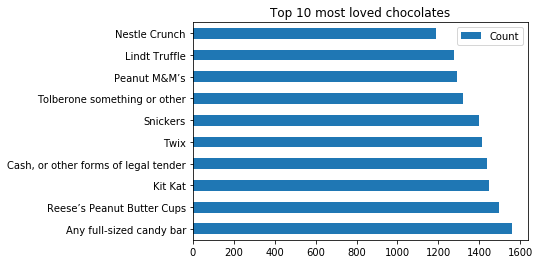

In [71]:
data.plot(kind='barh', title='Top 10 most loved chocolates');

### Top 10 most hated chocolates

In [72]:
TopDESPAIR = {}
for i in df.iloc[:,4:-3].columns:
    TopDESPAIR[i] = df[i].value_counts()['DESPAIR']

In [73]:
TopDESPAIRdf = pd.DataFrame(data=TopDESPAIR, index=['Count'])

In [74]:
TopDESPAIRdf = TopDESPAIRdf.transpose()

In [75]:
TopDESPAIRdf.head()

,Count
100 Grand Bar,84
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),1088
Any full-sized candy bar,17
Black Jacks,792
Bonkers (the candy),494


In [76]:
data = TopDESPAIRdf.sort_values('Count', ascending=False).head(10)

In [77]:
data

,Count
Broken glow stick,1624
Real Housewives of Orange County Season 9 Blue-Ray,1480
Gum from baseball cards,1461
White Bread,1455
Kale smoothie,1435
Dental paraphenalia,1432
Creepy Religious comics/Chick Tracts,1405
Candy that is clearly just the stuff given out for free at restaurants,1325
Whole Wheat anything,1289
Those odd marshmallow circus peanut things,1252


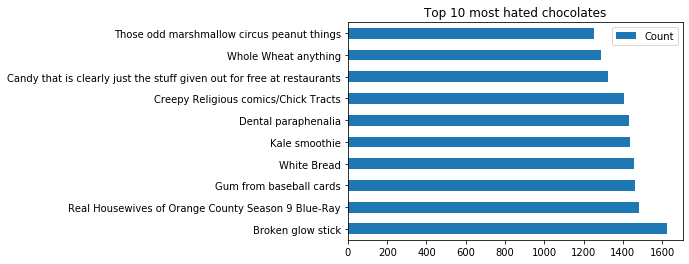

In [78]:
data.plot(kind='barh', title='Top 10 most hated chocolates');

### Fuzzy

In [66]:
string = "London"
choices = pd.Series(['Londan', 'LONDON',
'cairo', 'England', 'Ali'])
process.extract(string, choices, limit = 5)

[('LONDON', 100, 1),
 ('Londan', 83, 0),
 ('England', 46, 3),
 ('Ali', 22, 4),
 ('cairo', 18, 2)]

## Thank you for completeing the candy data notebook, Hope you enjoyed the journey